<a href="https://colab.research.google.com/github/Charish53/Dl_lab/blob/main/LAB03/Digit_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MNIST Digit Classification using CNN Architecture**

## 1. Import Python Libraries **bold text**

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,layers,models
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 2.LeNet5 Architecture

In [26]:
from IPython.display import Image
image_url = "https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg"
Image(url=image_url)


## 3.Load Dataset & Split Train and Test Data

In [27]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

# Normalize data and reshape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to (28, 28, 1) to represent grayscale images
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [38]:
# Print the total number of data points, training and testing sets
total_samples = len(y_train) + len(y_test)
print(f"Total number of samples: {total_samples}")
print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")

Total number of samples: 70000
Number of training samples: 60000
Number of testing samples: 10000


## 3.Define the LeNet5 Architecture

In [28]:
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_14                 │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_15                 │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8572 - loss: 0.4830 - val_accuracy: 0.9627 - val_loss: 0.1240
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9701 - loss: 0.0994 - val_accuracy: 0.9758 - val_loss: 0.0769
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 0.9713 - val_loss: 0.0903
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0457 - val_accuracy: 0.9819 - val_loss: 0.0626
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9833 - val_loss: 0.0531
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9804 - val_loss: 0.0642
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9842 - val_loss: 0.0532
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0201 - 

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.9872 - loss: 0.0465
Test Loss: 0.0465
Test Accuracy: 0.9872


In [33]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [35]:
from sklearn.metrics import accuracy_score
z=accuracy_score(y_test,y_pred_classes)
z*100


98.72

Text(0.5, 1.0, 'Model Accuracy')

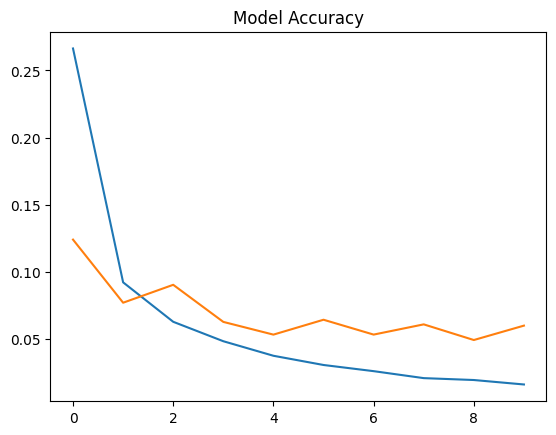

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model Accuracy')

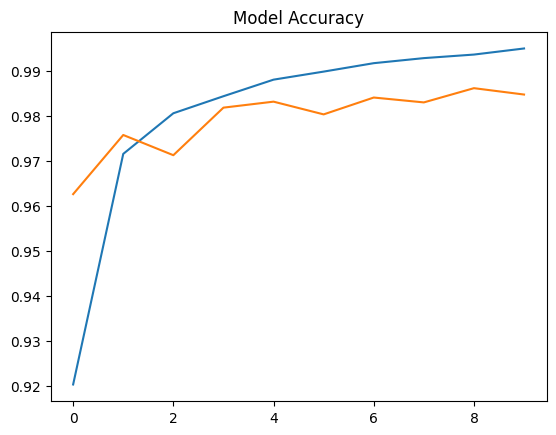

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


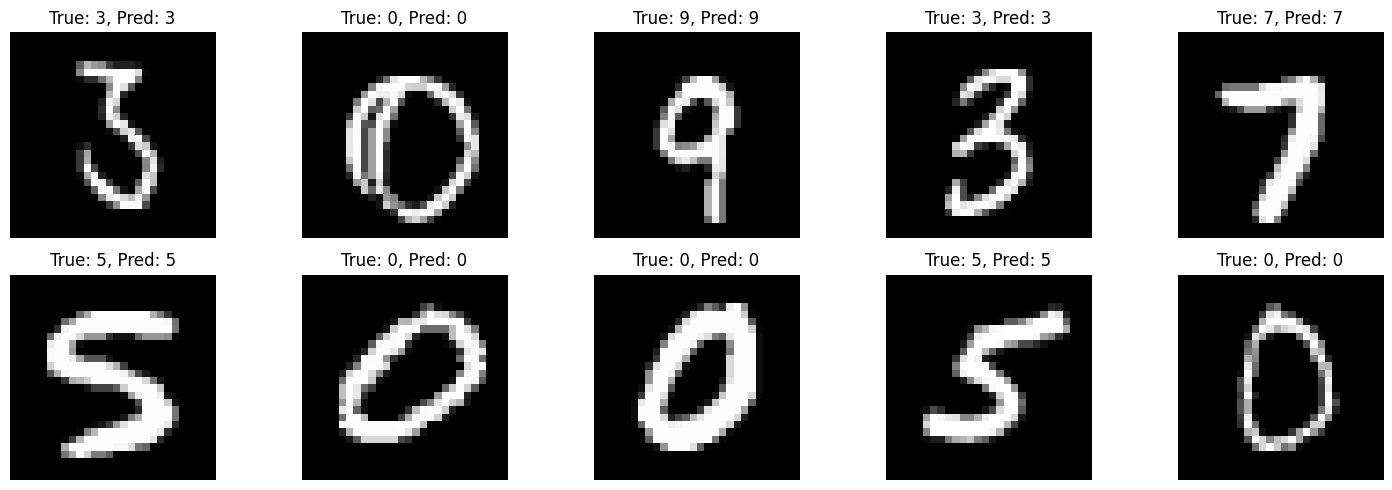

In [49]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_images = X_test[random_indices]  # Shape: (10, 28, 28, 1)
true_labels = y_test[random_indices]

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



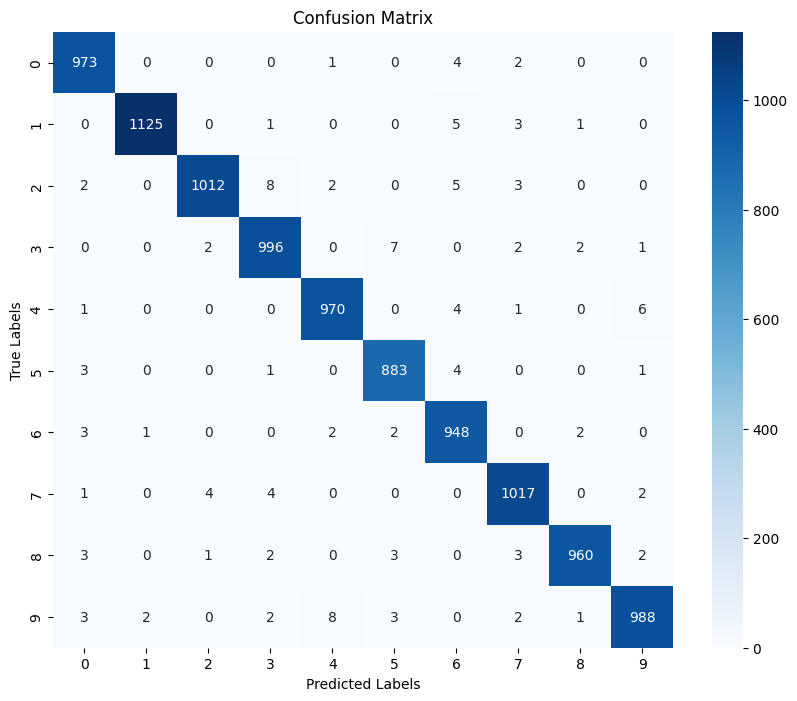

In [50]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()